### 1. Explain how to use a Markov chain monte carlo method to generate the value of a random vector X_1, ... X_10 whose distribution is approximately the conditional distribution of 10 independent exponential random variables with common mean 1 given that product(X_i) > 20.

In [3]:
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
def pi(arr):
    if len(arr)==1:
        return arr[0]
    else:
        a=arr[-1]
        result=a*pi(arr[:-1])
        return result

In [4]:
xseq1=[0.5,0.7,1,1.5,1.8,2,2.2,2.4,2,2.6]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
xseq2=[0.5,0.7,1,1.5,1.8,2,2.2,2.4,2,2.6]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
x1history1=[]; # x1 sampling history of way1
x1history2=[]; # x1 sampling history of way2
pixhistory1=[]; # pix sampling history of way1
pixhistory2=[]; #pix sampling history of way2

In [5]:
#way 1
for i in range(10000):
    for j in range(10):
        xjcandidate=np.random.exponential(1); #xj 를 exp 에서 후보 뽑기
        xseqcandidate=xseq1; #x(j-1) 까지 업데이트 되었던 xseq 가져오기
        xseqcandidate[j]= xjcandidate; #[x1,x2,,,,xj,,,,x10] 후보 새롭게 구성
        if pi(xseqcandidate)>20: #새롭게 구성한 [x1,x2,,,,xj,,,,x10] pi 값 확인
            xseq1=xseqcandidate; #20이 넘는다면 후보를 accept
        else:
            while pi(xseqcandidate)<=20: #pi 가 20이 안 넘으면 넘을때까지...
                xjcandidate= np.random.exponential(1);
                xseqcandidate[j]=xjcandidate;
            xseq1=xseqcandidate; #넘었으니 accept
    x1history1.append(xseq1[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory1.append(pi(xseq1)); #pi x sampling 모으기

In [7]:
#way 2
for k in range(10000):
    for l in range(10):
        xother=xseq2[:l]+xseq2[l+1:];
        piother=pi(xseq2); #xl 빼고 나머지 값들의 곱
        minimum=20/piother; #xl 이 가질수 있는 최솟값
        xseq2[l]=st.expon.rvs(minimum) # st.expon.rvs(a) = random sampling of f(x)=exp(-(x-a)), x>=a
    x1history2.append(xseq2[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory2.append(pi(xseq2)); #pi x sampling 모으기

In [8]:
x1history1=x1history1[:9500];
pixhistory1=pixhistory1[:9500];
x1history2=x1history2[:9500];
pixhistory2=pixhistory2[:9500];

In [9]:
xaxis=[];
for k in range(9500):
    xaxis.append(k+1)

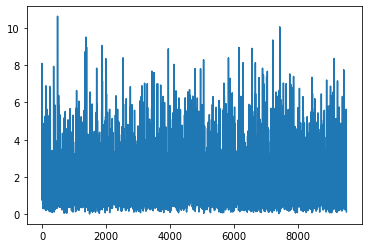

In [10]:
plt.plot(xaxis,x1history1);

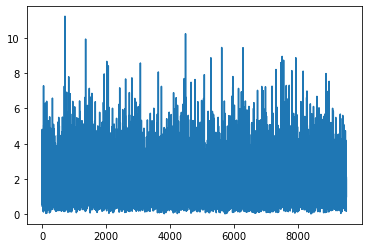

In [11]:
plt.plot(xaxis,x1history2);

1.9097342038003342


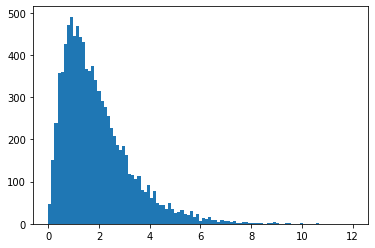

In [13]:
mean1=sum(x1history1)/len(x1history1)
print(mean1)
xaxis=np.linspace(0,12,100)
plt.hist(x1history1, bins=xaxis);

1.8545139767464203


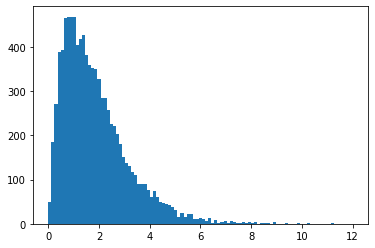

In [14]:
mean2=sum(x1history2)/len(x1history2)
print(mean2)
plt.hist(x1history2, bins=xaxis);

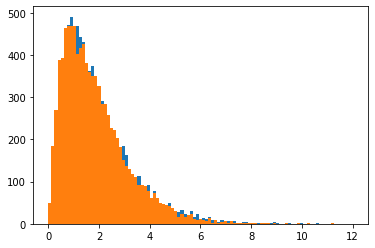

In [15]:
plt.hist(x1history1, bins=xaxis);
plt.hist(x1history2, bins=xaxis);

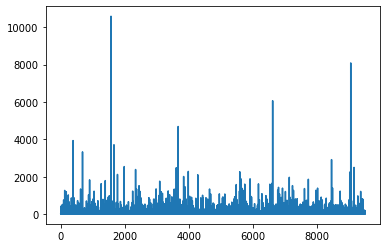

In [16]:
plt.plot(pixhistory1);

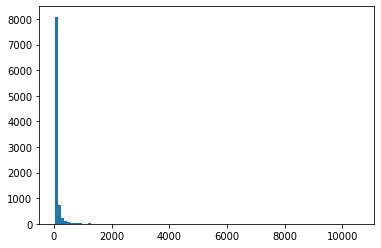

In [17]:
plt.hist(pixhistory1, bins=100);

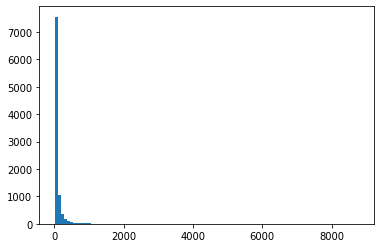

In [18]:
plt.hist(pixhistory2, bins=100);

### HW2. Algorithm Comparison

Gibbs sampling

Pros

- We can execute sampling only with conditional distributions
- Conditional distributions might have lower dimensions with better usability

Cons

- Long convergence time especially with the dimensionality of the data growing. Convergence time also depends on the shape of the distribution.
- Difficulty in finding the posterior for each variable.
- Generally, samples from the beginning of the chain (the burn-in period) may not accurately represent the desired distribution. Hence it is often discarded. Thinning can also be used — i.e. keeping every kth sample of the Markov Chain.

Metropolis Hastings

Pros

- Easy to apply (no need for conditional distributions)
- Handle well with high dimensionality & high correlation

Cons
- Although it works significantly better in high dimension than other accept-reject algorithms (it handles fairly well the curse of conditionality), It has a “burn in” rate, namely it converges slowly and the target is not achieved immediately.
- Rare events are hardly taken.
- Samples are correlated

Hamiltonian Monte Carlo

- Possible applications are limited to the case when gradient exists and can be computed in reasonable time
- distances between successive generated points are typically large, so we need less iterations to get representative sampling
- 'price' of a single iteration is higher, but HMC is still significantly more efficient
- Hamiltonian MC in most cases accepts new states (take a look at rejected samples in the demonstrations!)
- still, HMC has problems with sampling from distributions with isolated local minimums 
Investigate last distribution at low temperatures — 'puck' doesn't have enough energy to jump from the first minimum to the second over the energy barrier.

No-U-Turn Sampler
- HMC가 desired number of steps parameter L ($\epsilon$은 step size parameter) 에 의존하는 것을 없애주면서 여전히 HMC처럼 독립적인 sample들을 효율적으로 만들어냄<br>

동휘 형 과제 참고함 + <br>
https://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html -HMC <br>
https://towardsdatascience.com/can-you-do-better-sampling-strategies-with-an-emphasis-on-gibbs-sampling-practicals-and-code-c97730d54ebc - gibbs <br>
https://medium.com/nerd-for-tech/metropolis-hastings-review-2dfeb0c3d0eb -MH 참고

In [20]:
import numpy as np
from scipy.stats import uniform, expon, gaussian_kde
import matplotlib.pyplot as plt

In [48]:
def circlePlot(n):
    x = uniform.rvs(loc = -1, scale = 2, size=n)
    y = uniform.rvs(loc = -1, scale = 2, size=n)
    Acc = []
    Rej = []
    
    for i in range(n):
        if x[i]**2 + y[i]**2 < 1:
            Acc.append((x[i],y[i]))
        else:
            Rej.append((x[i],y[i]))
    
    figure, axes = plt.subplots(1,1,figsize=(12,12))
    plt.scatter([x[0] for x in Acc], [x[1] for x in Acc],s = 2, color = 'green')
    plt.scatter([x[0] for x in Rej], [x[1] for x in Rej],s = 2, color = 'red')
    c = plt.Circle((0,0),1,fill=False)
    axes.add_artist(c)
    
    pi = 4 * len(Acc) / n
    print('pi =', pi)

pi = 3.1512


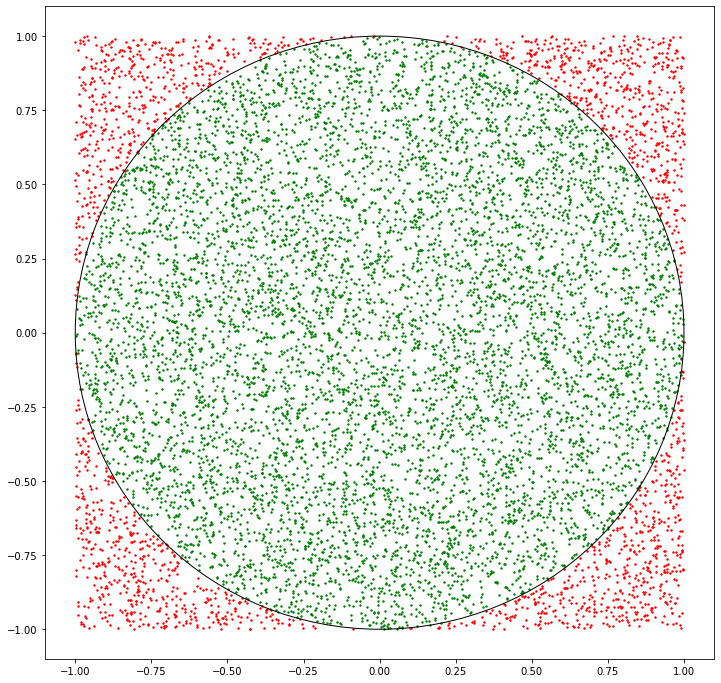

In [49]:
circlePlot(10000)

pi = 3.14008


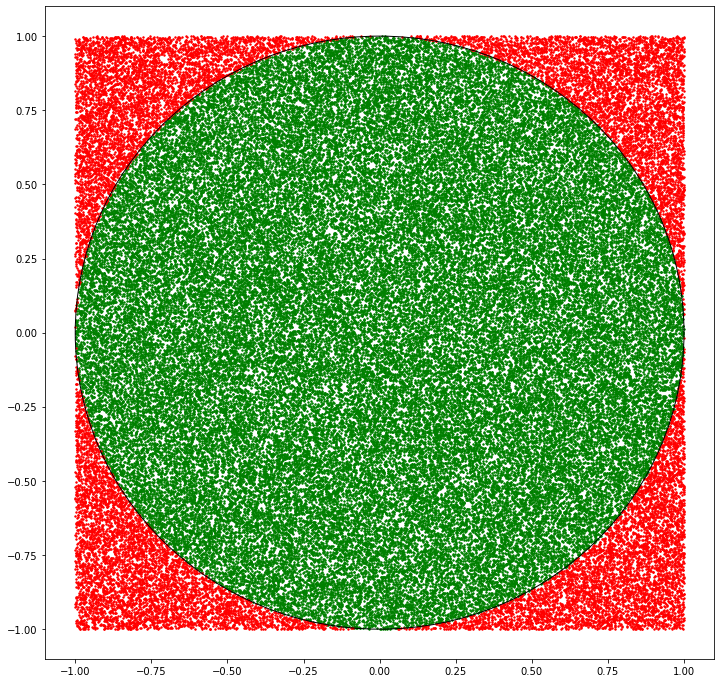

In [50]:
circlePlot(100000)

pi = 3.140696


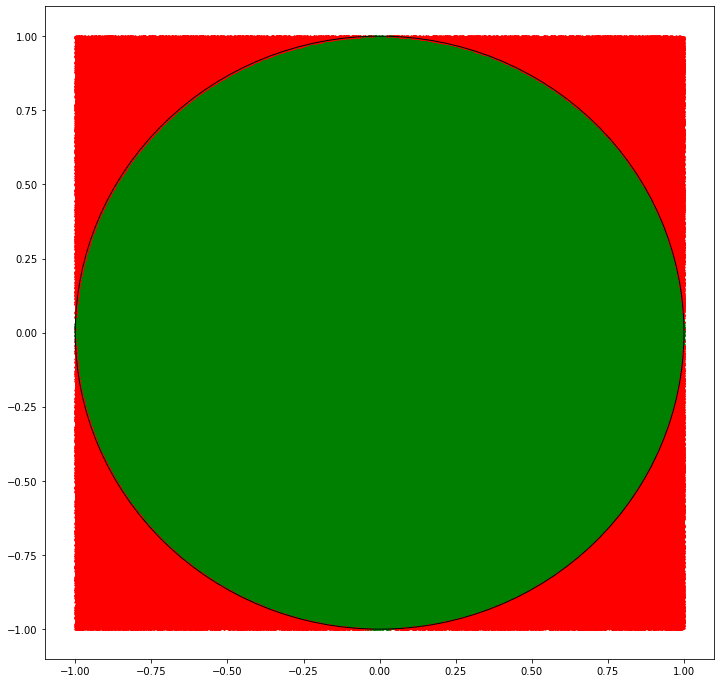

In [51]:
circlePlot(1000000)